** More detials of the table, 'titanic-data.csv'**

**Import Part**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sean

In [223]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Get the data from titanic-data.csv by pandas.read_csv()

In [2]:
titanic_info = pd.read_csv('titanic-data.csv')

## Questions

** The main topic is <font color=red>SURVIVED</font> ** 

After watching the describle of titanic_info, PassengerId can be ignored firstly.

<ul>
    <li>What is the relationship between survival and age?</li>
    <li>What is the relationship between survival and sex?</li>
    <li>What is the relationship between survival and sibsp/parch?</li>
    <li>What is the relationship between survival and fare?</li>
    <li>What is the relationship between survival and cabin/Embarked?</li>
</ul>

Get the basic info about the titanic_info

In [203]:
titanic_info['count'] = titanic_info.apply(lambda x: 1, axis=1)
titanic_info.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,count
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In all passengers, survivors were <font color=red>younger</font> than victims.

Maybe younger people was moving faster than older, but I like to say that young is future in the peoples' mind when they had to face the choice about life and death, and the limited chances.

In [216]:
survived_compare_age = titanic_info.groupby('Survived').mean()[['Age']]
survived_compare_age

,Age
Survived,
0,30.626179
1,28.343690


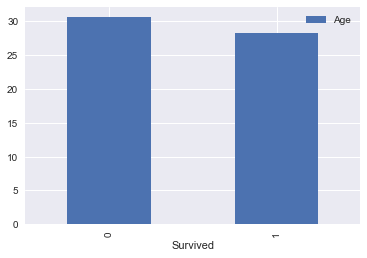

In [282]:
survived_compare_age.plot(kind='bar')

In all survivors, the number of <font color=red>female-survivors</font> is twice as much as male-surivors.

Obviously, <font color=red>females</font> got high priority in all.

In [271]:
survived_compare_sex_sum = titanic_info.groupby('Sex').sum()[['Survived', 'count']]
survived_compare_sex_sum['survival_rate'] = survived_compare_sex_sum['Survived']/survived_compare_sex_sum['count']
survived_compare_sex_sum

,Survived,count,survival_rate
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


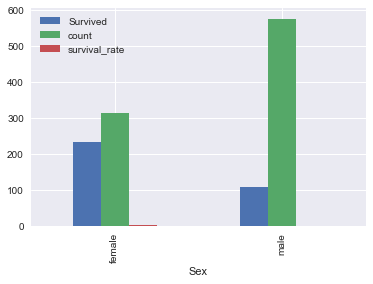

In [296]:
survived_compare_sex_sum.plot(kind='bar')

First sight in the data that is confusing me, the mean-age of female-survivors was greater than female-victims.

younger males got high priority to be saved, but females was not.

I thought that there were serveral possible reasons :
<ul>
    <li>Pregnant women</li>
    <li>mothers with babies</li>
    <li>noble ladies</li>
</ul>

In [76]:
sex_compare_mean = titanic_info.groupby(['Sex', 'Survived']).mean()[['Age']]
sex_compare_mean

Age
Sex    Survived           
female 0         25.046875
       1         28.847716
male   0         31.618056
       1         27.276022

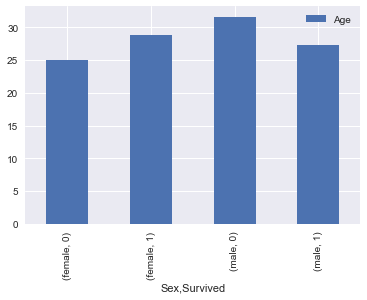

In [297]:
sex_compare_mean.plot(kind='bar')

It is obviously, <font color=red>alone</font> person got more opportunities to lived.

If people with parents, children or some relatives, people had to take care of kins, which was slower moving instead of fast-alone in escaping, chances were missing every second in disaster.

In [268]:
parch_compare = titanic_info.groupby(['Parch']).sum()[['Survived']]
sibsp_compare = titanic_info.groupby(['SibSp']).sum()[['Survived']]
parch_sibsp_compare = titanic_info.groupby(['Parch', 'SibSp']).sum()[['Survived', 'count']]
parch_sibsp_compare['survival_rate'] = parch_sibsp_compare['Survived']/parch_sibsp_compare['count']

In [269]:
parch_compare, sibsp_compare

(       Survived
 Parch          
 0           233
 1            65
 2            40
 3             3
 4             0
 5             1
 6             0,        Survived
 SibSp          
 0           210
 1           112
 2            13
 3             4
 4             3
 5             0
 8             0)

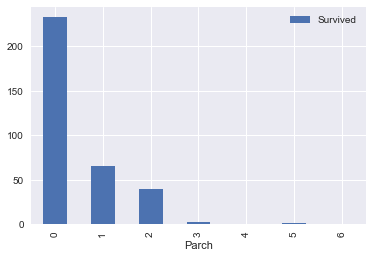

In [309]:
parch_compare.plot(kind='bar')

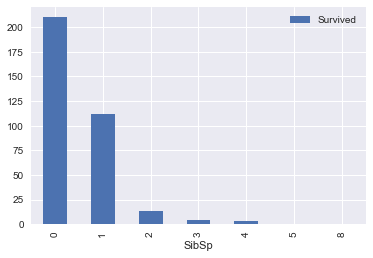

In [310]:
sibsp_compare.plot(kind='bar')

In [270]:
parch_sibsp_compare

Survived  count  survival_rate
Parch SibSp                                
0     0           163    537       0.303538
      1            64    123       0.520325
      2             4     16       0.250000
      3             2      2       1.000000
1     0            25     38       0.657895
      1            34     57       0.596491
      2             6      7       0.857143
      3             0      7       0.000000
      4             0      9       0.000000
2     0            21     29       0.724138
      1            12     19       0.631579
      2             2      4       0.500000
      3             2      7       0.285714
      4             3      9       0.333333
      5             0      5       0.000000
      8             0      7       0.000000
3     0             1      1       1.000000
      1             1      3       0.333333
      2             1      1       1.000000
4     0             0      1       0.000000
      1             0      3       0.000000
5     0             0      2       0.000000
      1             1      3       0.333333
6     1             0      1       0.000000

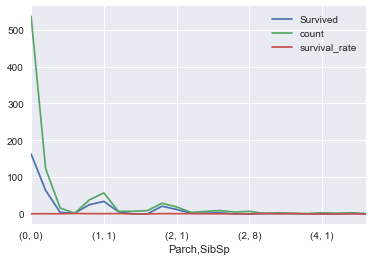

In [304]:
parch_sibsp_compare.plot()

I'm not sure the second is worse than first and third, Maybe

In [266]:
pclass = titanic_info.groupby(['Pclass']).sum()[['Survived', 'count']]
pclass['survival_rate'] = pclass['Survived']/pclass['count']
pclass

,Survived,count,survival_rate
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


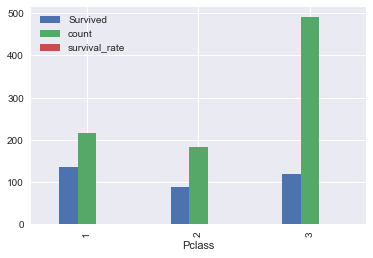

In [312]:
pclass.plot(kind='bar')

Except female, younger, alone or vulnerable reasons, in saving action, rescue team must pay more attention to the <font color=red>higher fare</font> passengers, who were rich or noble.

In [314]:
fare = titanic_info.groupby(['Survived']).mean()[['Fare']]
fare

,Fare
Survived,
0,22.117887
1,48.395408


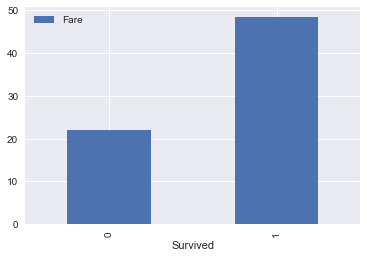

In [316]:
fare.plot(kind='bar')

I believed more females with high fare who were noble ladies or with rich spouses.

In [318]:
fare_sex_compare = titanic_info.groupby(['Survived', 'Sex']).mean()[['Fare']]
fare_sex_compare

Fare
Survived Sex              
0        female  23.024385
         male    21.960993
1        female  51.938573
         male    40.821484

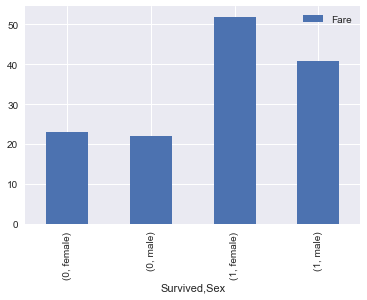

In [320]:
fare_sex_compare.plot(kind='bar')

During the boat crashed into the iceberg, most of survivors were not in thier room, it was harder to escape when people not in the deck.

In [327]:
cabin = titanic_info[['Cabin', 'Survived']]
cabin_np = np.array(cabin)
cabin_np

array([[nan, 0L],
       ['C85', 1L],
       [nan, 1L],
       ..., 
       [nan, 0L],
       ['C148', 1L],
       [nan, 0L]], dtype=object)

In [255]:
cabin_d = dict([])
for i in cabin_np:
    if i[0] not in cabin_d:
        cabin_d[i[0]] = i[1]
    else:
        cabin_d[i[0]] += i[1]

In [342]:
cabin_set = dict([])
for k, v in cabin_d.items():
    if type(k) == str:
        if k[0] not in cabin_set:
            cabin_set[k[0]] = v
        else:
            cabin_set[k[0]] += v
    if type(k) != str:
        cabin_set[k] = v
cabin_set

{nan: 206L,
 'A': 7L,
 'B': 35L,
 'C': 35L,
 'D': 25L,
 'E': 24L,
 'F': 8L,
 'G': 2L,
 'T': 0L}

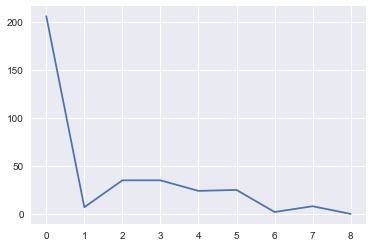

In [344]:
plt.plot(cabin_set.values())

C - France, Q - New Zealand, S - UK

Many passengers came from UK, although Franch-survival_rate was greatest, which more  than a half, the data could say nothing. 

The data still had said that female-survival_rate was the highest

In [264]:
embarked = titanic_info.groupby(['Embarked']).sum()[['Survived', 'count']]
embarked['survival_rate'] = embarked['Survived']/embarked['count']
embarked

,Survived,count,survival_rate
Embarked,,,
C,93,168,0.553571
Q,30,77,0.389610
S,217,644,0.336957


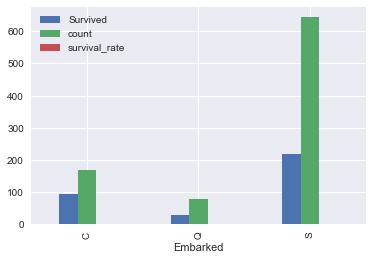

In [346]:
embarked.plot(kind='bar')

In [265]:
embarked_sex = titanic_info.groupby(['Embarked', 'Sex']).sum()[['Survived', 'count']]
embarked_sex['survival_rate'] = embarked_sex['Survived']/embarked_sex['count']
embarked_sex

Survived  count  survival_rate
Embarked Sex                                   
C        female        64     73       0.876712
         male          29     95       0.305263
Q        female        27     36       0.750000
         male           3     41       0.073171
S        female       140    203       0.689655
         male          77    441       0.174603

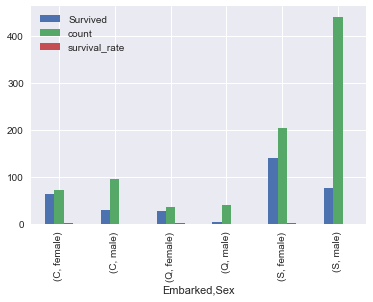

In [348]:
embarked_sex.plot(kind='bar')

## Conclusion

The survival rate was close to <font color=red>sex, age</font> and <font color=red>fare</font>.

About sex, <font color=red>female</font> is Vulnerable Groups in social, they got highest priority to alive.

About age, <font color=red>old people and children</font> are Vulnerable Groups, but it is too complicate to understand when people facing disaster, humanity or morality and so on. just say that in the time, old people thought that the future is belong to <font color=red>young</font>.

About fare, this is a stone rule that <font color=red>more paid</font>, more return, whatever service or products， expensive price with excellent experience.

About others, the time what were you doing or where you were, with a strong randomness and unpredictability.